## **Desafio 2T - Data Science**

#### **Instruções:**  

*   Leia a descrição do dataset disponibilizado no link:
  
  https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?datasetId=205965
  
    Este dataset será utilizado para a realização da avaliação.

*   Atenção para as informações de atributo, isto irá lhe auxiliar a entender os dados em questão.

*   Você poderá utilizar qualquer biblioteca para realizar a avaliação.

*   Você poderá utilizar Python ou R como linguagem.

*   Você é encorajado a gerar visualizações (com matplotlib, seaborn, plotly, etc). Estas visualizações devem seguir o contexto da pergunta.
  Por exemplo: Se a pergunta for “qual a cidade que mais vende produtos?”, você pode apresentar um gráfico de barras que apresente a quantidade de vendas de todas as cidades. Estas visualizações agregam no quesito “valor” da avaliação.

*   Você é encorajado a realizar o tratamento dos dados, como dropar ou preencher valores nulos, identificar e corrigir valores duplicados (exemplo: ‘Brasil’ e ‘brazil’ se tornam “Brasil”), realizar engenharia de features (como criar um campo de hora, com base no campo de data) e outros tipos de tratamento.

*   É necessário uma “resposta final” para cada pergunta. Esta resposta final será a resposta considerada com maior peso em cada questão.
  Ex: “P: Qual o gênero que mais compra? Qual a quantidade comprada?
  R: Masculino. 451 produtos”

#### Este projeto tem como objetivo responder as seguintes perguntas:



*   P1: Qual o “product_line” com maior “quantity” de vendas?

*   P2: Qual  o “product_line” mais vendido para cada gênero?
    Masculino:
    Feminino:

*   P3: Qual a “City” que possui maior “quantity” de vendas para homens? Qual o ‘product_line’ mais vendido para eles?

*   P4: Qual “Branch” possui a maior somatória de “total”?

*   P5: É correto afirmar que a “branch A” possui apenas vendas na ‘city’ Yangon? Justifique.

*   P6: Qual a ‘branch’ com maior ‘rating’?

*   P7: Qual a ‘city’ com maior rating?

*   P8: No contexto geral, qual ‘gender’ possui a média mais alta de ‘rating’?

*   P9: Qual ‘branch’ recebe mais ‘payment’ em cartão de crédito (credit card)? Qual recebe mais em dinheiro (Cash)?

*   P10: Qual HORA ‘time’ tem maior  ‘quantity’ vendida? (considere apenas Hora, não minutos)

*   P11: Qual dia do mês ‘Date’ possui maior ‘quantity’ vendida?

*   P12: Qual ‘line_item’ possui a pior avaliação da loja? Qual ‘gender’ publicou mais avaliações negativas?

## **Convertendo Notebook para HTML Imprimindo como PDF**

In [ ]:
# Gera HTML para download que é possível salvar como PDF
!jupyter nbconvert --to html /content/RSS_Avaliação_2_tri_Data_Science.ipynb

[NbConvertApp] Converting notebook /content/RSS_Avaliação_2_tri_Data_Science.ipynb to html
[NbConvertApp] Writing 993447 bytes to /content/RSS_Avaliação_2_tri_Data_Science.html


# **Análise Exploratória de Dados - Supermarket Sales**

In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd

In [ ]:
# Caminho de acesso ao dataset
supermarket = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Avaliações-AceleraJovem-Dataside/2ª Avaliação - Acelera Jovem/supermarket_sales - Sheet1.csv',
                      sep = ',', encoding = 'iso-8859-1')

# **Extração e Limpeza dos Dados**

In [ ]:
# Cabelhaço do dataframe
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Cauda do dataframe
supermarket.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [ ]:
# O dataframe possuí o total de: 1000 linhas x 17 colunas
# Esses representam os registros de vendas do supermercado
supermarket.shape

(1000, 17)

In [ ]:
# Dados estatísticos descritivos
supermarket.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
# Consulta da tipagem dos atributos do dataframe com dtypes
# object: strings
# int64: inteiros
# float64: reais
supermarket.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
# Criando um novo dataframe para garantir a integridade do dataframe original
# Convertendo registros da coluna 'Date' para: datetime64[ns]: data
smkt = supermarket
smkt['Date'] = smkt['Date'].astype('datetime64')

In [ ]:
# Convertendo registros da coluna 'Time' para: datetime64[ns]: data
smkt['Time'] = supermarket['Time'].astype('datetime64')

In [ ]:
# Consulta da tipagem dos atributos do dataframe após alteração com dtypes
# datetime64[ns]: data
smkt.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [ ]:
# Consulta e soma de valores missing por variável
smkt.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
# Padronização dos cabeçalhos
smkt = smkt.rename(columns = {'Invoice ID': 'INVOICE_ID', 
                              'Branch': 'BRANCH',
                              'City': 'CITY',
                              'Customer type': 'CUSTOMER_TYPE',
                              'Gender': 'GENDER',
                              'Product line': 'PRODUCT_LINE',
                              'Unit price': 'UNIT_PRICE',
                              'Quantity': 'QUANTITY',
                              'Tax 5%': 'TAX_5%',
                              'Total': 'TOTAL',
                              'Date': 'DATE',
                              'Time': 'TIME',
                              'Payment': 'PAYMENT',
                              'cogs': 'COGS',
                              'gross margin percentage': '%_GROSS_MARGIN',
                              'gross income': 'GROSS_INCOME',
                              'Rating': 'RATING'})

In [ ]:
# Constatando alteração do cabeçalho
smkt.head()

,INVOICE_ID,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,UNIT_PRICE,QUANTITY,TAX_5%,TOTAL,DATE,TIME,PAYMENT,COGS,%_GROSS_MARGIN,GROSS_INCOME,RATING
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-09-27 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-09-27 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-09-27 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-09-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-09-27 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Função calendario retorna serie em nova coluna no dataframe
def calendario(x):
    day = x.day
    month = x.month
    year = x.year
    return pd.Series([day, month, year])


# Função horario retorna serie em nova coluna no dataframe
def horario(x):
    hour = x.hour
    # minute = x.minute
    # second = x.second
    return pd.Series([hour]) # minute, second

In [ ]:
# Dicionário de dados abreviados: dia da semana
dias_abreviado = {'Sunday': 'Sun',
                  'Monday': 'Mon',
                  'Tuesday': 'Tue',
                  'Wednesday': 'Wed',
                  'Thursday': 'Thu',
                  'Friday': 'Fri',
                  'Saturday': 'Sat'}

# Dicionário de dados abreviados: mês
mes_abreviado = {'January': 'Jan',
                 'February': 'Feb',
                 'March': 'Mar',
                 'April': 'Apr',
                 'May': 'May',
                 'June': 'Jun',
                 'July': 'Jul',
                 'August': 'Aug',
                 'September': 'Sep',
                 'October': 'Oct',
                 'November': 'Nov',
                 'December': 'Dec'}

In [ ]:
# Armazenando informações 'dia'
day_smkt = smkt['DATE'].dt.day_name().replace(dias_abreviado)

In [ ]:
# Armazenando informações 'mês'
month_smkt = smkt['DATE'].dt.month_name().replace(mes_abreviado)

In [ ]:
# Criando novas colunas: 'DAY', 'MONTH' e 'YEAR'
smkt[['DAY', 'MONTH', 'YEAR']] = smkt['DATE'].apply(calendario)

In [ ]:
# Criando nova coluna: 'HOUR'
# Função criada contém possibilidade de criação para: ['MINUTE', 'SECOND']
smkt['HOUR'] = smkt['TIME'].apply(horario)

In [ ]:
# Criando nova coluna: 'WEEKDAY'
smkt['WEEKDAY'] = day_smkt

In [ ]:
# Criando nova coluna: 'SHORT_MONTH' (mês abreviado)
smkt['SHORT_MONTH'] = month_smkt

In [ ]:
# Abreviando registros coluna 'GENDER' - de: Female ~ Male / para: F ~ M
smkt['GENDER'] = smkt['GENDER'].replace({'Female': 'F', 'Male': 'M'})

In [ ]:
# Excluindo colunas do dataframe: 'INVOICE_ID' e '%_GROSS_MARGIN'
smkt = smkt.drop(columns = ['INVOICE_ID', '%_GROSS_MARGIN'])

In [ ]:
# Constatando alteração de 'Drop', 'Create' e 'Alter' no dataframe 
smkt.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,UNIT_PRICE,QUANTITY,TAX_5%,TOTAL,DATE,...,PAYMENT,COGS,GROSS_INCOME,RATING,DAY,MONTH,YEAR,HOUR,WEEKDAY,SHORT_MONTH
0,A,Yangon,Member,F,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,...,Ewallet,522.83,26.1415,9.1,5,1,2019,13,Sat,Jan
1,C,Naypyitaw,Normal,F,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,...,Cash,76.40,3.8200,9.6,8,3,2019,10,Fri,Mar
2,A,Yangon,Normal,M,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,...,Credit card,324.31,16.2155,7.4,3,3,2019,13,Sun,Mar
3,A,Yangon,Member,M,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,...,Ewallet,465.76,23.2880,8.4,27,1,2019,20,Sun,Jan
4,A,Yangon,Normal,M,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,...,Ewallet,604.17,30.2085,5.3,8,2,2019,10,Fri,Feb


#### Durante a primeira etapa de analise dos dados foi possível identificar os seguintes pontos:

*   Total de variáveis
*   Total de registros
*   Verificação dos dados estatísticos descritivos
*   Tipagem dos dados
*   Verificação de valores nulos

#### Como alternativa optei por:

*   Normalizar todo cabeçalho, com o objetivo de deixar a leitura mais clara
*   Simplificando os registros da coluna de Gênero, mudando de Female e Male para F e M
*   Alterando a tipagem da coluna Date e Time que antes estavam como object e foi alterada para datetime, já que realizaremos transformações com base dessas features.
*   Criação de novas colunas com valores individualizados (Data), buscando facilitar analise gráfica que será feita futuramente
*   E por fim Exclusão de colunas que não gera impacto direto no dataframe restante

#### **Contagem de Valores por Variável**

Abaixo optei por selecionar algumas variáveis e apresentar a contagem total com base dos seus registros.

In [ ]:
# Contando valores: 'BRANCH'
smkt['BRANCH'].value_counts()

A    340
B    332
C    328
Name: BRANCH, dtype: int64

In [ ]:
# Contando valores: 'CITY'
smkt['CITY'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: CITY, dtype: int64

In [ ]:
# Contando valores: 'CUSTOMER_TYPE'
smkt['CUSTOMER_TYPE'].value_counts()

Member    501
Normal    499
Name: CUSTOMER_TYPE, dtype: int64

In [ ]:
# Contando valores: 'GENDER'
smkt['GENDER'].value_counts()

F    501
M    499
Name: GENDER, dtype: int64

In [ ]:
# Contando valores: 'PRODUCT_LINE'
smkt['PRODUCT_LINE'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: PRODUCT_LINE, dtype: int64

In [ ]:
# Contando valores: 'RATING'
# Range aplicável ao 'RATING' de: 1 à 10
# 'RATING' atribuido nos registros de: 4 à 10
smkt['RATING'].value_counts().sort_index()

4.0     11
4.1     17
4.2     22
4.3     18
4.4     17
        ..
9.6     17
9.7     14
9.8     19
9.9     16
10.0     5
Name: RATING, Length: 61, dtype: int64

#### **Separando Dataframes por Filial: A, B e C**

In [ ]:
# Armazendo registros exclusivos 'BRANCH == A'
smkt_A = smkt.loc[smkt.BRANCH == 'A']

In [ ]:
# Cabelhaço do dataframe 'BRANCH: A'
smkt_A.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,UNIT_PRICE,QUANTITY,TAX_5%,TOTAL,DATE,...,PAYMENT,COGS,GROSS_INCOME,RATING,DAY,MONTH,YEAR,HOUR,WEEKDAY,SHORT_MONTH
0,A,Yangon,Member,F,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,...,Ewallet,522.83,26.1415,9.1,5,1,2019,13,Sat,Jan
2,A,Yangon,Normal,M,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,...,Credit card,324.31,16.2155,7.4,3,3,2019,13,Sun,Mar
3,A,Yangon,Member,M,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,...,Ewallet,465.76,23.2880,8.4,27,1,2019,20,Sun,Jan
4,A,Yangon,Normal,M,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,...,Ewallet,604.17,30.2085,5.3,8,2,2019,10,Fri,Feb
6,A,Yangon,Member,F,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,...,Ewallet,413.04,20.6520,5.8,25,2,2019,14,Mon,Feb


In [ ]:
# Total registros 'BRANCH: A'
smkt_A.shape

(340, 21)

In [ ]:
# Armazendo registros exclusivos 'BRANCH == B'
smkt_B = smkt.loc[smkt.BRANCH == 'B']

In [ ]:
# Cabelhaço do dataframe 'BRANCH: B'
smkt_B.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,UNIT_PRICE,QUANTITY,TAX_5%,TOTAL,DATE,...,PAYMENT,COGS,GROSS_INCOME,RATING,DAY,MONTH,YEAR,HOUR,WEEKDAY,SHORT_MONTH
9,B,Mandalay,Member,F,Food and beverages,54.84,3,8.226,172.746,2019-02-20,...,Credit card,164.52,8.226,5.9,20,2,2019,13,Wed,Feb
10,B,Mandalay,Member,F,Fashion accessories,14.48,4,2.896,60.816,2019-02-06,...,Ewallet,57.92,2.896,4.5,6,2,2019,18,Wed,Feb
11,B,Mandalay,Member,M,Electronic accessories,25.51,4,5.102,107.142,2019-03-09,...,Cash,102.04,5.102,6.8,9,3,2019,17,Sat,Mar
15,B,Mandalay,Member,F,Sports and travel,93.72,6,28.116,590.436,2019-01-15,...,Cash,562.32,28.116,4.5,15,1,2019,16,Tue,Jan
19,B,Mandalay,Normal,F,Home and lifestyle,40.30,2,4.030,84.630,2019-03-11,...,Ewallet,80.60,4.030,4.4,11,3,2019,15,Mon,Mar


In [ ]:
# Total registros 'BRANCH: B'
smkt_B.shape

(332, 21)

In [ ]:
# Armazendo registros exclusivos 'BRANCH == C'
smkt_C = smkt.loc[smkt.BRANCH == 'C']

In [ ]:
# Cabelhaço do dataframe 'BRANCH: C'
smkt_C.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,UNIT_PRICE,QUANTITY,TAX_5%,TOTAL,DATE,...,PAYMENT,COGS,GROSS_INCOME,RATING,DAY,MONTH,YEAR,HOUR,WEEKDAY,SHORT_MONTH
1,C,Naypyitaw,Normal,F,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,...,Cash,76.40,3.8200,9.6,8,3,2019,10,Fri,Mar
5,C,Naypyitaw,Normal,M,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,...,Ewallet,597.73,29.8865,4.1,25,3,2019,18,Mon,Mar
7,C,Naypyitaw,Normal,F,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,...,Ewallet,735.60,36.7800,8.0,24,2,2019,11,Sun,Feb
20,C,Naypyitaw,Member,M,Electronic accessories,86.04,5,21.5100,451.7100,2019-02-25,...,Ewallet,430.20,21.5100,4.8,25,2,2019,11,Mon,Feb
34,C,Naypyitaw,Member,F,Food and beverages,99.42,4,19.8840,417.5640,2019-02-06,...,Ewallet,397.68,19.8840,7.5,6,2,2019,10,Wed,Feb


In [ ]:
# Total registros 'BRANCH: C'
smkt_C.shape

(328, 21)

#### Foi interessante realizar essa segmentação de informações pois ajudou a visualizar subgrupos com antes estão apresentados apenas em forma de registro no dataframe, com essa granularidade é possível identificar informações dos seguintes grupos:

*   Quantidade Total por BRANCH(Filial): A, B e C

*   Quantidade Total por CITY(Cidade): Yangon, Mandalay e Naypyitaw 

*   Quantidade Total por CUSTOMER_TYPE(Tipo de Cliente): Member e Normal 

*   Quantidade Total por GENDER(Gênero): F e M 

*   Quantidade Total por PRODUCT_LINE(Linha de Produtos): Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle e Sports and travel

*   Quantidade Total por RATING(Classificação XP de Compra do Cliente): Nota Classificada entre 4 e 10 nos últimos 3 meses dentre um agrupamento do total de 61 notas únicas para os 1000 registros do dataset

*   E por fim a separação dos 3 (três) dataframes com registros exclusivos por Branch (Filial). Desta forma é possível iniciar novos estudos com foco exclusivo na unidade em questão.

# **Visualização de Dados**

In [ ]:
# Importando bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

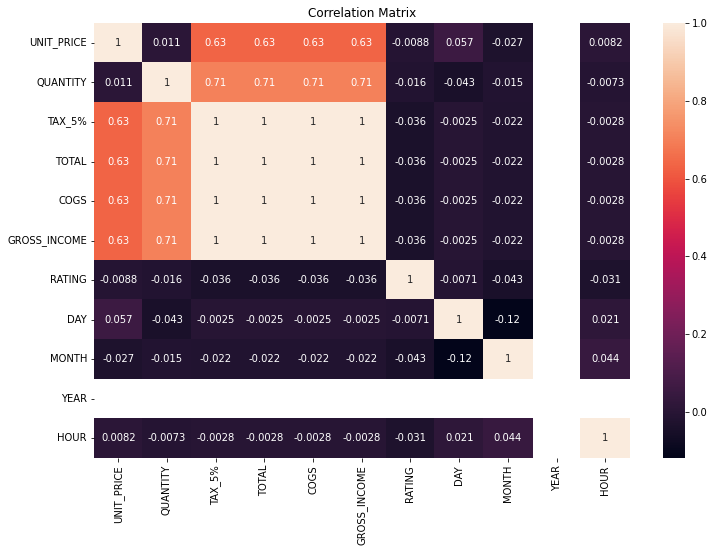

In [ ]:
# Gráfico de correlação por variáveis
smktCorr=smkt.corr()
plt.figure(figsize=(12,8))
plt.title('Correlation Matrix')
sns.heatmap(smktCorr,annot=True)
plt.show()

#### Com esse plot é possível verificar a primeiro momento quais variáveis se correlacionam, ou seja, qual influência diretamente no resultado da outra. Como leitura basta verificar:

*    Onde a pontuação estiver 1 ou próxima do mesmo existe uma alta correlação

*    Caso a pontuação esteja mais próxima do 0 consideramos uma correlação baixa, entre as variáveis.

#### **P1: Qual o “product_line” com maior “quantity” de vendas?**

In [ ]:
# Contando valores: 'PRODUCT_LINE'
smkt['PRODUCT_LINE'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: PRODUCT_LINE, dtype: int64

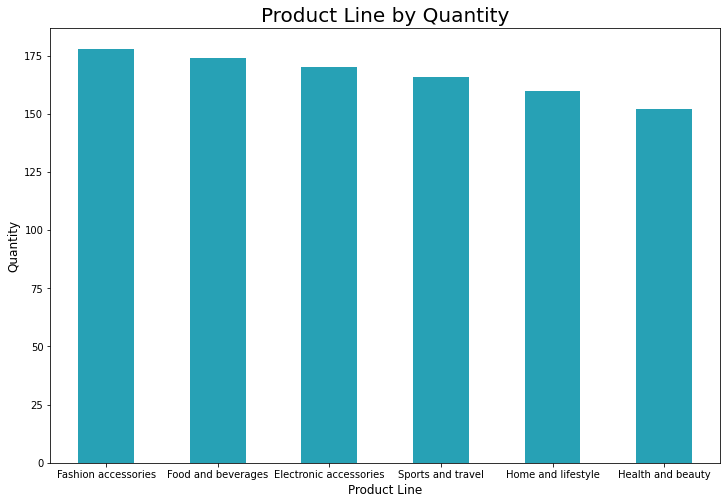

In [ ]:
# Gráfico de barras: 'Producty Line by Quantity'
plt.figure(figsize = (12, 8))
linhaProduto = smkt.groupby('PRODUCT_LINE').count()['QUANTITY'].sort_values(ascending=False)
linhaProduto.plot(kind = 'bar', color = '#27A1B5')
plt.title('Product Line by Quantity', fontsize=20)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation = 0)
plt.show()

#### **R1: Dentre as 6 (seis) linhas de produtos, podemos constatar que:**

*   A linha de produtos Fashion Accessories é a que houve o maior número de vendas
*   Com o Total de 178 itens vendidos.

#### **P2: Qual o “product_line” mais vendido para cada gênero? Masculino e Feminino**

In [ ]:
# Consulta e contagem: 'PRODUCT_LINE' x 'GENDER == F'
smkt.query('GENDER == "F"')['PRODUCT_LINE'].value_counts()

Fashion accessories       96
Food and beverages        90
Sports and travel         88
Electronic accessories    84
Home and lifestyle        79
Health and beauty         64
Name: PRODUCT_LINE, dtype: int64

In [ ]:
# Consulta e contagem: 'PRODUCT_LINE' x 'GENDER == M'
smkt.query('GENDER == "M"')['PRODUCT_LINE'].value_counts()

Health and beauty         88
Electronic accessories    86
Food and beverages        84
Fashion accessories       82
Home and lifestyle        81
Sports and travel         78
Name: PRODUCT_LINE, dtype: int64

In [ ]:
# Agrupamento e contagem: 'PRODUCT_LINE', 'GENDER' x 'QUANTITY'
genderProductLine = smkt.groupby(['PRODUCT_LINE', 'GENDER']).count()['QUANTITY']
genderProductLine

PRODUCT_LINE            GENDER
Electronic accessories  F         84
                        M         86
Fashion accessories     F         96
                        M         82
Food and beverages      F         90
                        M         84
Health and beauty       F         64
                        M         88
Home and lifestyle      F         79
                        M         81
Sports and travel       F         88
                        M         78
Name: QUANTITY, dtype: int64

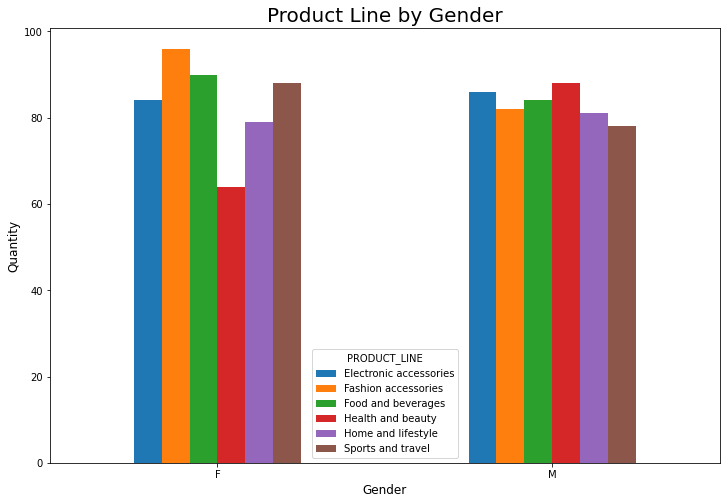

In [ ]:
# Gráfico de barras: 'Product Line by Gender'
genderProductLine.unstack(level = 0).plot(figsize = (12, 8), kind = 'bar')
plt.title('Product Line by Gender', fontsize=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation = 0)
plt.show()

#### **R2: Após realização dos agrupamentos por gênero e linha de produto, foi possível identificar:**

*   Gênero Feminino: Consumiu o total de 96 compras na categoria - Fashion Acessories

*   Gênero Masculino: Consumiu o total de 88 compras na categoria - Health and Beauty 

#### **P3: Qual a “City” que possui maior “quantity” de vendas para homens? Qual o ‘product_line’ mais vendido para eles?**

In [ ]:
# Agrupamento e contagem: 'CITY', 'GENDER' x 'QUANTITY'
smkt.groupby(['CITY', 'GENDER']).count()['QUANTITY']

CITY       GENDER
Mandalay   F         162
           M         170
Naypyitaw  F         178
           M         150
Yangon     F         161
           M         179
Name: QUANTITY, dtype: int64

In [ ]:
# Dataframe com registros 'GENDER == M'
genderM = smkt.loc[smkt.GENDER == 'M']

In [ ]:
# Dataframe com registros 'GENDER == M' para análise por CITY
cityM = smkt.loc[smkt.GENDER == 'M']

In [ ]:
# Agrupamento e contagem: 'CITY' x 'PRODUCT_LINE'
cityM = cityM.groupby(['CITY']).count()['PRODUCT_LINE'].sort_values(ascending=False)
cityM

CITY
Yangon       179
Mandalay     170
Naypyitaw    150
Name: PRODUCT_LINE, dtype: int64

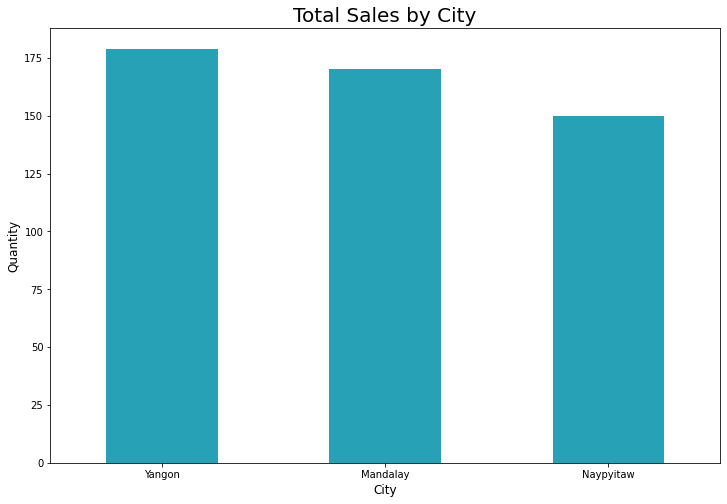

In [ ]:
# Gráfico de barras: 'Total Sales by City'
plt.figure(figsize = (12, 8))
cityM.plot(kind = 'bar', x = 'CITY', y = 'PRODUCT_LINE', color = '#27A1B5')
plt.title('Total Sales by City', fontsize=20)
plt.xlabel('City', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

In [ ]:
# Agrupamento e contagem: 'CITY', 'GENDER' x 'QUANTITY'
genderM.groupby(['CITY', 'GENDER']).count()['QUANTITY'].sort_values(ascending=False)

CITY       GENDER
Yangon     M         179
Mandalay   M         170
Naypyitaw  M         150
Name: QUANTITY, dtype: int64

In [ ]:
# Agrupamento e contagem: 'CITY', 'PRODUCT_LINE' x 'QUANTITY'
genderM = genderM.groupby(['CITY', 'PRODUCT_LINE']).count()['QUANTITY'].sort_values(ascending=False)
genderM

CITY       PRODUCT_LINE          
Yangon     Food and beverages        35
           Home and lifestyle        33
Mandalay   Health and beauty         33
           Sports and travel         32
Yangon     Electronic accessories    32
           Sports and travel         30
Naypyitaw  Fashion accessories       30
Mandalay   Fashion accessories       29
Naypyitaw  Health and beauty         29
           Food and beverages        28
Mandalay   Home and lifestyle        28
Naypyitaw  Electronic accessories    27
Mandalay   Electronic accessories    27
Yangon     Health and beauty         26
           Fashion accessories       23
Mandalay   Food and beverages        21
Naypyitaw  Home and lifestyle        20
           Sports and travel         16
Name: QUANTITY, dtype: int64

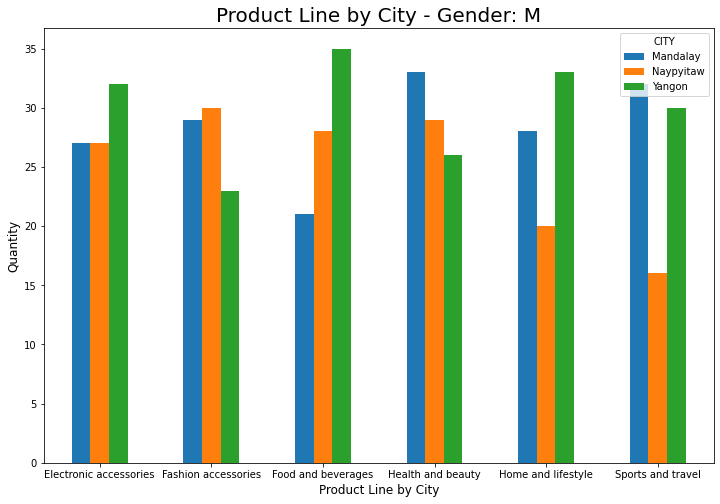

In [ ]:
# Gráfico de barras: 'Product Line by City - Gender: M'
genderM.unstack(level = 0).plot(figsize = (12, 8), kind = 'bar')
plt.title('Product Line by City - Gender: M', fontsize=20)
plt.xlabel('Product Line by City', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation = 0)
plt.show()

#### **R3: Através do agrupamento dos dados e análise gráfica foi possível constatar que:**

*   A cidade que possuí o maior número de vendas para o Gênero Masculino é: Yangon com o total de 179 vendas realizadas.

*   Também é possível afirmar que a cidade de Yangon lidera o ranking de vendas por linha de produtos do tipo: Food and Beverages contendo o total de 35 vendas registradas.

#### **P4: Qual “Branch” possui a maior somatória de “total”?**

In [ ]:
# Soma Total por Filial: 'BRANCH' x 'TOTAL'
somatoria = round(smkt.groupby('BRANCH').sum(), 2)
somatoria['TOTAL'].iloc[:].sort_values(ascending=False)

BRANCH
C    110568.71
A    106200.37
B    106197.67
Name: TOTAL, dtype: float64

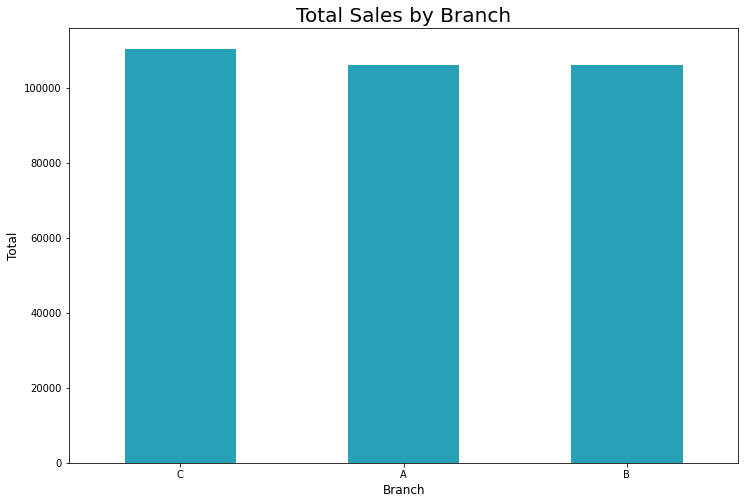

In [ ]:
# Gráfico de barras: 'Total Sales by Branch'
plt.figure(figsize = (12, 8))
somatoria = smkt.groupby('BRANCH').sum()['TOTAL'].sort_values(ascending=False)
somatoria.plot(kind = 'bar', x = 'BRANCH', y = 'TOTAL', color = '#27A1B5')
plt.title('Total Sales by Branch', fontsize=20)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

#### **R4: Após somatória realizada para as 3 (três) Filiais, temos as seguintes informações:**

*   Branch C: US$ 110568.71

*   Branch A: US$ 106200.37

*   Branch B: US$ 106197.67

Assim podemos concluir que a Filial C possui a maior somatória do Total de Vendas. 

#### **P5: É correto afirmar que a “branch A” possui apenas vendas na ‘city’ Yangon? Justifique.**

In [ ]:
# Dataframe contagem geral por: 'BRANCH'
branchGeral = pd.DataFrame(smkt['BRANCH'].value_counts())
branchGeral

,BRANCH
A,340
B,332
C,328


In [ ]:
# Dataframe com registros 'BRANCH == A'
branchA = smkt.loc[smkt.BRANCH == 'A']

In [ ]:
# Cabelhaço do dataframe 'BRANCH: A'
branchA.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,UNIT_PRICE,QUANTITY,TAX_5%,TOTAL,DATE,...,PAYMENT,COGS,GROSS_INCOME,RATING,DAY,MONTH,YEAR,HOUR,WEEKDAY,SHORT_MONTH
0,A,Yangon,Member,F,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,...,Ewallet,522.83,26.1415,9.1,5,1,2019,13,Sat,Jan
2,A,Yangon,Normal,M,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,...,Credit card,324.31,16.2155,7.4,3,3,2019,13,Sun,Mar
3,A,Yangon,Member,M,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,...,Ewallet,465.76,23.2880,8.4,27,1,2019,20,Sun,Jan
4,A,Yangon,Normal,M,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,...,Ewallet,604.17,30.2085,5.3,8,2,2019,10,Fri,Feb
6,A,Yangon,Member,F,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,...,Ewallet,413.04,20.6520,5.8,25,2,2019,14,Mon,Feb


In [ ]:
# Total registros 'BRANCH: A'
branchA.shape

(340, 21)

In [ ]:
# Agrupamento e contagem: 'CITY', 'BRANCH' x 'QUANTITY'
branchA.groupby(['CITY', 'BRANCH']).count()['QUANTITY'].sort_values(ascending=False)

CITY    BRANCH
Yangon  A         340
Name: QUANTITY, dtype: int64

In [ ]:
# Consulta e contagem: 'CITY' x 'BRANCH == A'
# Resultado de 340 registros, sendo todos da mesma cidade
branchA.query('BRANCH == "A"')['CITY'].value_counts()

Yangon    340
Name: CITY, dtype: int64

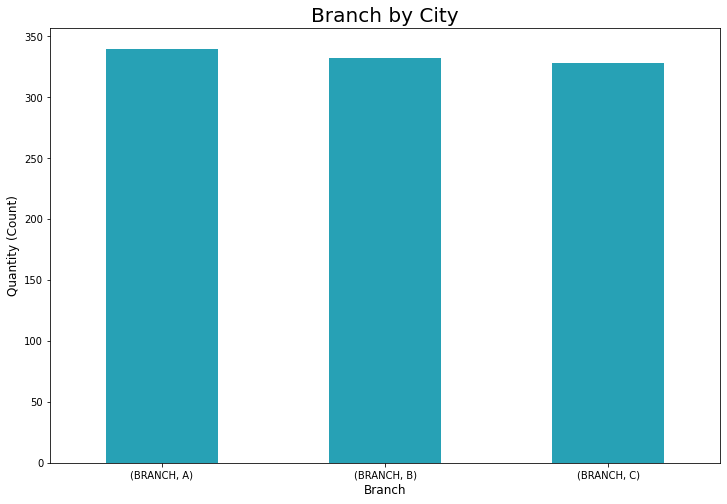

In [ ]:
# Gráfico de barras: 'Branch by City'
branchGeral.unstack(level = 0).plot(figsize = (12, 8), kind = 'bar', color = '#27A1B5')
plt.title('Branch by City', fontsize=20)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Quantity (Count)', fontsize=12)
plt.xticks(rotation = 0)
plt.show()

#### **R5: Como solução para questão cinco, optei por criar um novo dataframe com objetivo de manipulando e realizando sua segmentação de forma granular até chegar a algumas plotagens que evidenciassem e respondessem a pergunta em questão, como resultado realizei:**

*   Criação de um DataFrame apontando apenas as Branch com isso tivemos uma primeira visualização das Filiais: A, B e C

*   Seguido de um DataFrame onde armazenava apenas os registros da Branch A, com este em questão apresentei: Cabeçalho evidenciando apenas registros da mesma, seguido do shape onde aponta total de registros no dataframe, e por fim um agrupamento por Cidade, Filial e Quantidade(Contagem). Essa última em questão apresentou apenas registro de uma cidade: Yangon

*   Para garantir que o agrupamento foi realizado de forma eficiente, optei por realizar uma nova query desta vez com valores exclusivos, onde retornaria apenas: "BRANCH == "A"", desta forma garantindo que não haveria possibilidade de agrupar registros de filial distinta

*   Por fim optei por plotar um gráfico com o DataFrame que obtinha todas as filiais armazenadas, e foi possível ver três gráficos que coincidentemente apresentava que para cada cidade, existe apenas: 01 Filial, em outras palavras temos: Branch A: Yangon, Branch B: Mandalay e Branch C: Naypyitaw

Sendo assim, podemos afirmar que: Sim! Para a Branch A todos os registros de vendas são da cidade de Yangon.

#### **P6: Qual a ‘branch’ com maior ‘rating’?**

In [ ]:
# Agrupamento e contagem: 'RATING' x 'BRANCH'
smkt.groupby(['BRANCH']).count()['RATING'].sort_values(ascending=False)

BRANCH
A    340
B    332
C    328
Name: RATING, dtype: int64

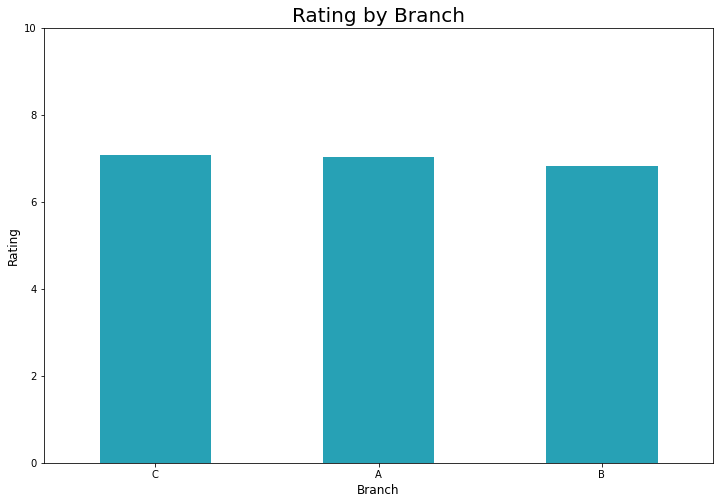

In [ ]:
# Gráfico de barras: 'Rating by Branch'
plt.figure(figsize = (12, 8))
ratingBranch = smkt.groupby('BRANCH').mean()['RATING'].sort_values(ascending=False)
ratingBranch.plot(kind = 'bar', color = '#27A1B5')
plt.ylim(0, 10)
plt.title('Rating by Branch', fontsize=20)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

#### **R6: Após análise realizada nas filias e avaliações de experiência de compra dos clientes foi possível constatar que:**

*   Branch: A - Possui o maior número de avaliações dentre as três analisadas, com o total de 340 registros 

*   Porém o Branch: C - Em análise gráfica apresenta melhor avaliado, com nota superior a 7 em um intervalo de 0 a 10, superando assim as filiais A e B.

#### **P7: Qual a ‘city’ com maior rating?**

In [ ]:
# Agrupamento e contagem: 'RATING' x 'CITY'
smkt.groupby(['CITY']).count()['RATING'].sort_values(ascending=False)

CITY
Yangon       340
Mandalay     332
Naypyitaw    328
Name: RATING, dtype: int64

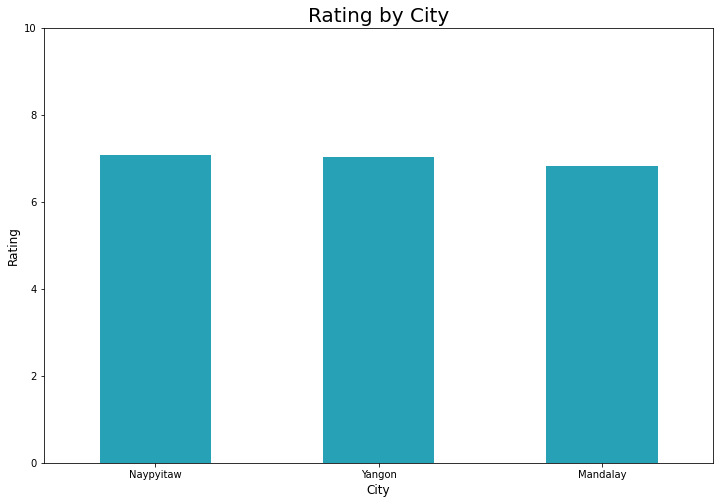

In [ ]:
# Gráfico de barras: 'Rating by City'
plt.figure(figsize = (12, 8))
ratingCity = smkt.groupby('CITY').mean()['RATING'].sort_values(ascending=False)
ratingCity.plot(kind = 'bar', color = '#27A1B5')
plt.ylim(0, 10)
plt.title('Rating by City', fontsize=20)
plt.xlabel('City', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

#### **R7: Seguindo a mesma linha de pensamento para o exercício 6 (seis), foi realizado a mesma análise, desta vez substituindo as BRANCH por CITY:**

*   Yangon - Possui o maior número de avaliações, já que tem o maior número de registros de vendas, totalizando 340

*   Mas a cidade de Naypyitaw - Segue como a cidade mais bem avaliada pelos clientes em geral, com nota superior a 7 em um intervalo de 0 a 10, superando assim as cidades de Yangon e Mandalay.

#### **P8: No contexto geral, qual ‘gender’ possui a média mais alta de ‘rating’?**

In [ ]:
# Agrupamento e contagem: 'RATING' x 'GENDER'
smkt.groupby(['GENDER']).count()['RATING'].sort_values(ascending=False)

GENDER
F    501
M    499
Name: RATING, dtype: int64

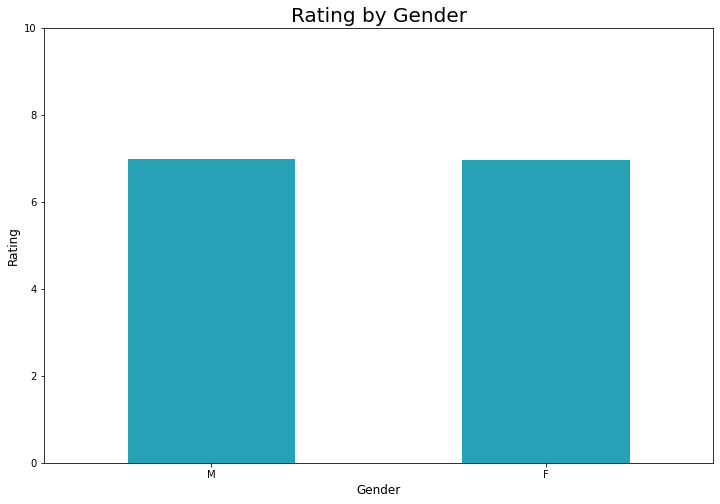

In [ ]:
# Gráfico de barras: 'Rating by Gender'
plt.figure(figsize = (12, 8))
ratingCity = smkt.groupby('GENDER').mean()['RATING'].sort_values(ascending=False)
ratingCity.plot(kind = 'bar', color = '#27A1B5')
plt.ylim(0, 10)
plt.title('Rating by Gender', fontsize=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

#### **R8: A avaliação de experiência do usuário com valor médio mais alto por gênero é do:**

*   Gênero: Masculino - Embora o valor esteja muito aproximado das avaliações do Gênero Feminino, através da classificação aplicada podemos ver existe uma pequena diferença entre ambos que encontram-se próximo de uma Nota = 7.

#### **P9: Qual ‘branch’ recebe mais ‘payment’ em cartão de crédito (credit card)? Qual recebe mais em dinheiro (Cash)?**

In [ ]:
# Dataframe com registros 'PAYMENT == Credit card'
paymentCredit = smkt.loc[smkt.PAYMENT == 'Credit card']

In [ ]:
# Dataframe com registros 'PAYMENT == Cash'
paymentCash = smkt.loc[smkt.PAYMENT == 'Cash']

In [ ]:
# Agrupamento e contagem: 'BRANCH' x 'PAYMENT' x 'Credit card'
paymentCredit = paymentCredit.groupby(['BRANCH']).count()['PAYMENT'].sort_values(ascending=False)
paymentCredit

BRANCH
B    109
A    104
C     98
Name: PAYMENT, dtype: int64

In [ ]:
# Agrupamento e contagem: 'BRANCH' x 'PAYMENT' x 'Cash'
paymentCash = paymentCash.groupby(['BRANCH']).count()['PAYMENT'].sort_values(ascending=False)
paymentCash

BRANCH
C    124
A    110
B    110
Name: PAYMENT, dtype: int64

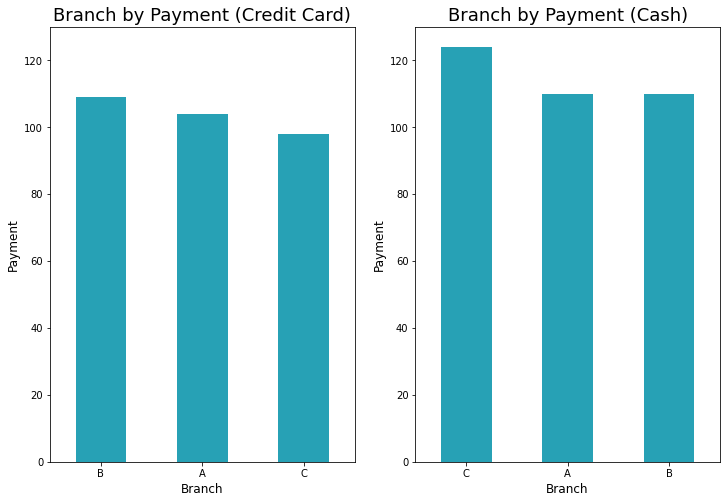

In [ ]:
# Gráfico de barras: 'Branch by Payment (Credit Card)'
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
paymentCredit.plot(kind = 'bar', x = 'BRANCH', y = 'PAYMENT', color = '#27A1B5')
plt.ylim(0, 130)
plt.title('Branch by Payment (Credit Card)', fontsize=18)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Payment', fontsize=12)
plt.xticks(rotation = 0)

# Gráfico de barras: 'Branch by Payment (Cash)'
plt.subplot(1, 2, 2)
paymentCash.plot(kind = 'bar', x = 'BRANCH', y = 'PAYMENT', color = '#27A1B5')
plt.ylim(0, 130)
plt.title('Branch by Payment (Cash)', fontsize=18)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Payment', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

#### **R9: Com base da análise gerada para as formas de pagamento por filias, foi constatado que:**

*   Payment - Credit card: Segue com a BRANCH: B como filial que mais recebe por está modalidade, totalizando o valor equivalente de 109 registros

*   Payment - Cash: Já para a forma de pagamento em Cash, a BRANCH: C lidera com o total de 124 registros.

#### **P10: Qual HORA ‘time’ tem maior ‘quantity’ vendida? (considere apenas Hora, não minutos)**

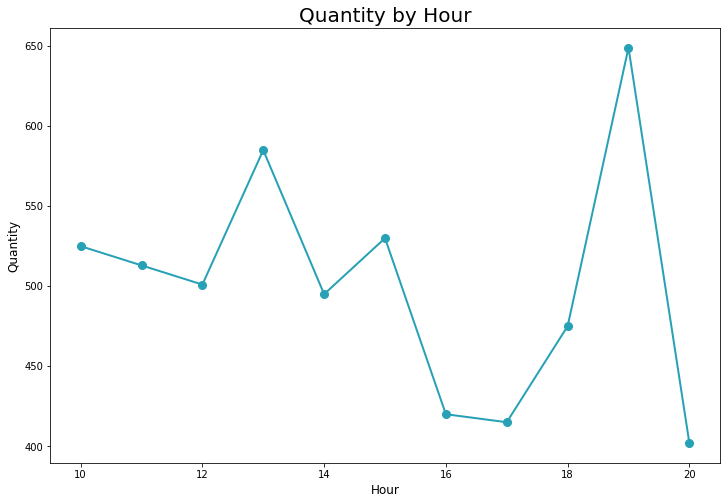

In [ ]:
# Gráfico de linha: 'Quantity by Hour'
qtdHour = smkt.groupby('HOUR').sum()['QUANTITY']
qtdHour.plot(figsize = (12, 8), color = '#27A1B5', lw = '2', ls = '-', marker = 'o', ms = '8')
plt.title('Quantity by Hour', fontsize=20)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

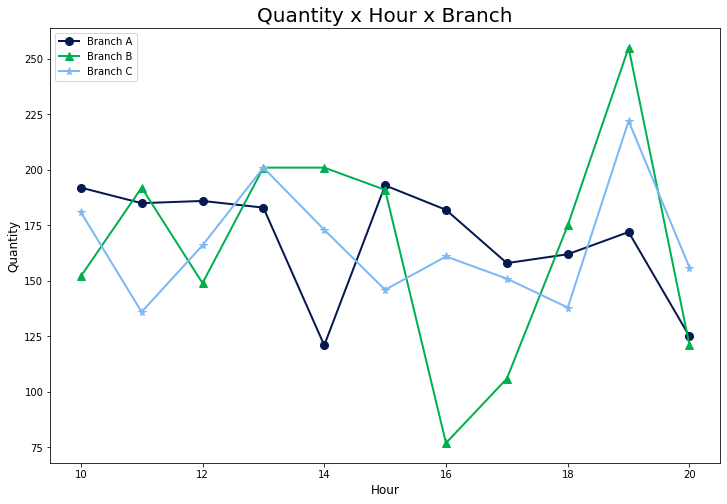

In [ ]:
# Gráfico de linha: 'Quantity x Hour x Branch'
qtdHourA = smkt_A.groupby('HOUR').sum()['QUANTITY']
qtdHourB = smkt_B.groupby('HOUR').sum()['QUANTITY']
qtdHourC = smkt_C.groupby('HOUR').sum()['QUANTITY']
qtdHourA.plot(figsize = (12, 8), color = '#05184F', lw = '2', ls = '-', marker = 'o', ms = '8', label = 'Branch A')
qtdHourB.plot(figsize = (12, 8), color = '#00B050', lw = '2', ls = '-', marker = '^', ms = '8', label = 'Branch B')
qtdHourC.plot(figsize = (12, 8), color = '#7CB7F7', lw = '2', ls = '-', marker = '*', ms = '8', label = 'Branch C')
plt.title('Quantity x Hour x Branch', fontsize=20)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.legend()
plt.xticks(rotation = 0)
plt.show();

#### **R10: Através do plot foi possível constatar que:**

*   Para o primeiro gráfico onde consta a plotagem geral das Branch: A, B e C podemos constatar que o horário com maior incidência de vendas ocorre às 19h.

*   Com o objetivo de identificar se este padrão atinge as 3 (três) unidades, optei por plotar um segundo gráfico onde contem registro de vendas das Branch's: A, B e C de forma individualizada, e no mesmo foi possível constatar que:

    *   Sim! Para as Branchs B e C existe um padrão de pico de vendas às 19h. O que influência diretamente no valor expressivo do gráfico geral.
    *   Apenas a Branch A que foge deste padrão, onde o pico de vendas ocorre às 15h.

#### **P11: Qual dia do mês ‘Date’ possui maior ‘quantity’ vendida?**

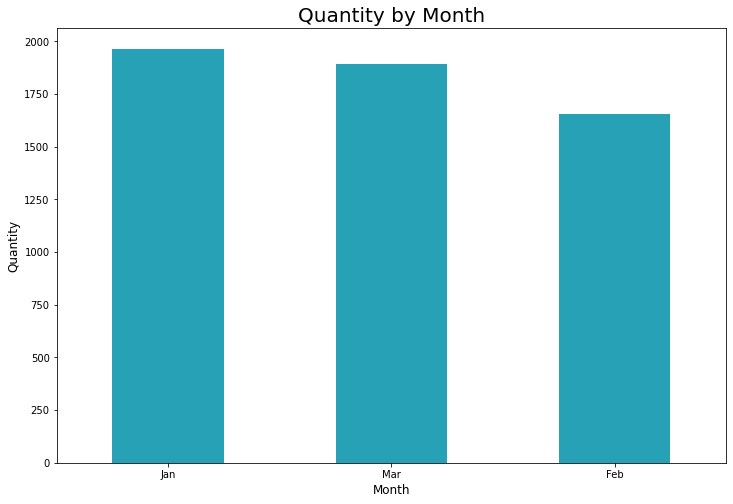

In [ ]:
# Gráfico de barras: 'Quantity by Month'
plt.figure(figsize = (12, 8))
qtdMonth = smkt.groupby('SHORT_MONTH').sum()['QUANTITY'].sort_values(ascending=False)
qtdMonth.plot(kind = 'bar', x = 'SHORT_MONTH', y = 'QUANTITY', color = '#27A1B5')
plt.title('Quantity by Month', fontsize=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

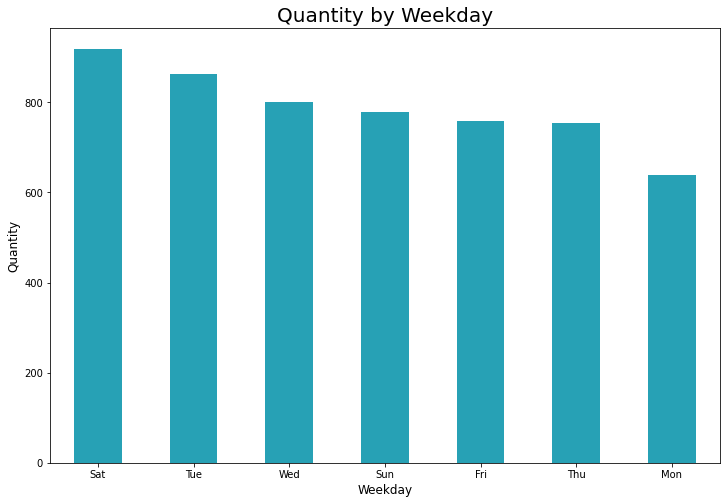

In [ ]:
# Gráfico de barras: 'Quantity by Weekday'
plt.figure(figsize = (12, 8))
qtdWeekDay = smkt.groupby('WEEKDAY').sum()['QUANTITY'].sort_values(ascending=False)
qtdWeekDay.plot(kind = 'bar', x = 'WEEKDAY', y = 'QUANTITY', color = '#27A1B5')
plt.title('Quantity by Weekday', fontsize=20)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

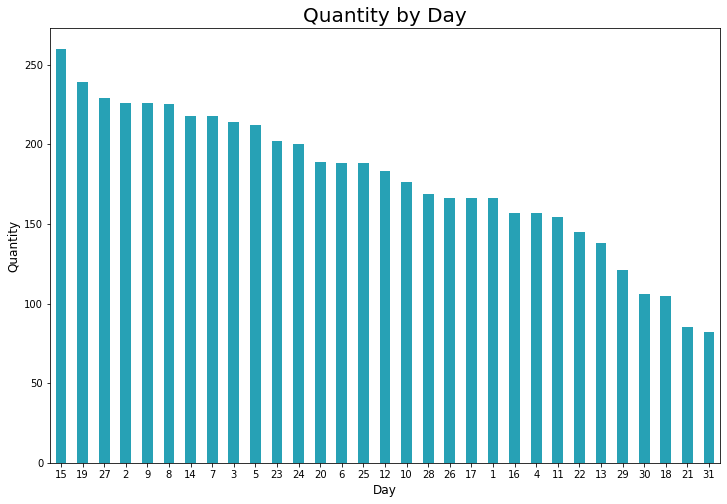

In [ ]:
# Gráfico de barras: 'Quantity by Day'
plt.figure(figsize = (12, 8))
qtdHour = smkt.groupby('DAY').sum()['QUANTITY'].sort_values(ascending=False)
qtdHour.plot(kind = 'bar', x = 'DAY', y = 'QUANTITY', color = '#27A1B5')
plt.title('Quantity by Day', fontsize=20)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

#### **R11: Com o objetivo de visualizar de forma granular a quantidade de vendas, comecei plotando gráfico de barras por:**

*   Month: Neste em questão é possível constatar que o mês de Janeiro obteve o maior registro itens vendidos, aproximando-se do total de 2000 unidades, seguido dos meses de Março e Fevereiro respectivamente

*   Weekday: Fragmentando um pouco mais os registros, vamos para os dias da semana e desta vez podemos destacar o Sábado com maior incidência do registro de itens vendidos, aproximando-se do total de 900 unidades

*   Day: E por fim como solicitado na questão, temos o gráfico por dias do mês e concluímos que o dia 15 ultrapassa o total de 250 registros/itens.

#### **P12: Qual ‘line_item’ possui a pior avaliação da loja? Qual ‘gender’ publicou mais avaliações negativas?**

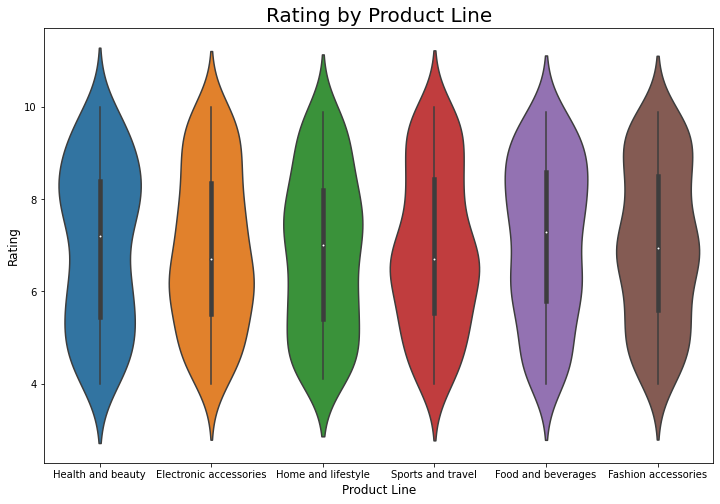

In [ ]:
# Gráfico de violino: 'Rating by Product Line'
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'PRODUCT_LINE', y = 'RATING', data= smkt)
plt.title('Rating by Product Line', fontsize=20)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

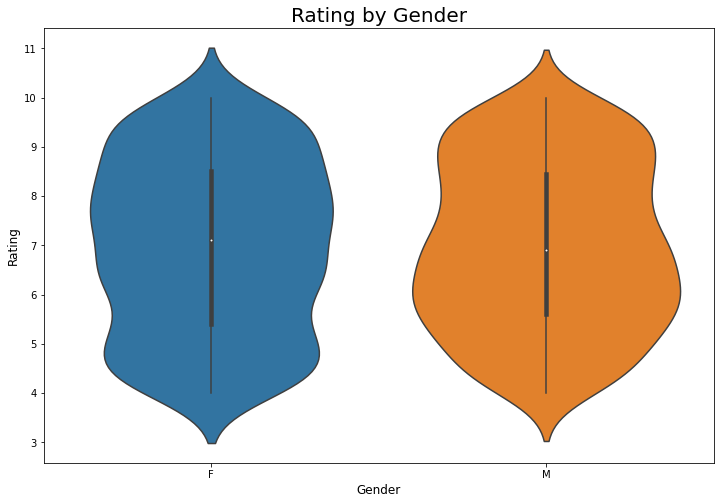

In [ ]:
# Gráfico de violino: 'Rating by Gender'
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'GENDER', y = 'RATING', data= smkt)
plt.title('Rating by Gender', fontsize=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation = 0)
plt.show();

#### **R12: As avaliações de experiência do usuário por compra realizada está distribuida da seguinte forma:**

*   Rating x Product Line: Entre as categorias de produtos é possível identificar que a linha Sports and Travel possui a pior avaliação dentre as 6 analisadas. Essa em questão tem uma concentração maior na parte inferior do gráfico entre os valores 4 e 7 do eixo y

*   Gender: Já para o gênero, os homens costumam avaliar negativamente com maior frequência, onde vemos a base do gráfico com espessura larga entre os valores 4 e 7 do eixo y.

# **Considerações Finais**

Após realizar todos as análises é possível chegar a seguinte conclusão: 

*   O Top 3 da categoria de produtos mais vendidos são: Fashion Acessories, Food and Beverages e Electronic Acessories, totalizando 522 dos registros das vendas.

*   Dentre as linhas de produto para o Gênero Feminino, temos em destaque a categoria Fashion Acessories com o total de 96 vendas.
E para o Gênero Masculino seguimos com Health and Beauty com o total de 88 registros vendidos.

*   O total de vendas por cidade é de:
    *   332 - Mandalay
    *   328 - Naypyitaw
    *   340 - Yangon

*   E dentre as três como vimos a cidade Yangon lidera com as vendas para os homens, com o total de 179 registros. Seguindo também como lider de vendas na categoria Food and Beverages com o total de 35 vendas registradass para o Gênero Masculino.

*   Vimos que ao todo temos o total de 3 Filiais, sendo elas: Branch: A, B e C.
Considerando a somatória de vendas por unidade foi possível chegar a conclusão que a Branch C detem o maior número de vendas, totalizando US$ 110568.71, seguido da unidade A e B.

*   As três Branchs citadas também estão distribuídas em três Cidades, e essas cidades detem apenas uma unidade específica por localidade, sendo assim temos:

    *   Branch A = Yangon
    *   Branch B = Mandalay
    *   Branch C = Naypyitaw

*   Seguindo a linha de Branch com maior número de vendas, a Branch C também lidera com o melhor Rating, obtendo a melhor avaliação média entre às três unidades. E como a Branch C está localizada apenas na cidade de Naypyitaw, a mesma segue como melhor avaliada entre as três analisadas.

*   Verificando a experiência de usuário por Gênero, foi possível constatar que a aproximação dentre os dois grupos é bem próxima, mas o Gênero Masculino, segue com uma leve diferença como gênero que melhor avalia a experiência de compra, aproximando-se da Nota 7.

*   Sobre a questão de forma de pagamento foi feita análise para Cartão de Crédito e Dinheiro, e quais Filiais que possuem a incidência de maior pagamento dos mesmos, chegamos a seguinte conclusão:

    *   Cartão de Crédito: Branch B - Total de 109 registros
    *   Dinheiro: Branch C - Total de 124 registros

*   Buscando entender mais sobre os picos de vendas dentre as três filiais, foi possível constatar que o horário que detém a maior incidência de vendas é às 19h. Esse padrão se estende para as Branchs: B e C, influênciando assim o alto registro de vendas no horário.

*   Além do melhor horário de venda, também foi segmentado por: Mês, Dia da Semana e Dia. E foi obtido os seguintes resultado:

    *   Janeiro como melhor mês de venda, chegando a aproximadamente 2000 registros de itens vendidos.

    *   Desmembrando ainda mais esses itens, dentre os dias da semana, temos o Sábado em destaque obtendo os melhores registros de saída de produtos, com 900 itens aproximadamente vendidos.

    *   E por fim o dia do mês com maior saída de produtos é o dia: 15 com valores superiores a 250 itens vendidos.

Desta forma acredito que é possível realizar ações para otimizar as vendas a partir de medidas como por exemplo, ofertas e promoções através das seguintes variáveis analisadas:

- Branch
- City
- Product Line
- Gender
- Hour
- Weekday
- Day

Focando os pontos fracos e obtendo melhores resultados com o objetivo de igualar todas as unidades ao nível de qualidade e obter melhores avaliações e lucros na receita bruta.